### Import Libraries

In [1]:
# YOLO object detection
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Deep Neural Network with YOLO Configuration and Weights

In [2]:
yolo = cv.dnn.readNetFromDarknet('yolov3_testing.cfg', 'yolov3_training_2000.weights')

### Read Classes file

In [3]:
classes=[]

with open("classes.txt","r") as f:
    classes=f.read().splitlines()

In [4]:
classes

['Screen Crack', 'Physical Damage']

In [5]:
len(classes)

2

### Read Input Image and Convert it to Blob

In [6]:
import glob
images=glob.glob("Images/*.jpg")
images[0]

'Images\\6443.dell-008.jpg'

In [7]:
img = cv.imread(images[3])
blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

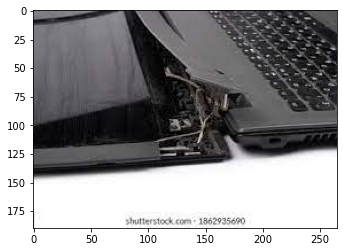

In [8]:
img_color=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_color);

### Acquire Height, Width and Number of Channels from Input Image

In [9]:
height, width, channels = img.shape

In [10]:
img.shape

(190, 265, 3)

In [11]:
blob.shape

(1, 3, 416, 416)

### Set blob as Input

In [12]:
yolo.setInput(blob)

### Get Output Layers

In [13]:
output_layers_name=yolo.getUnconnectedOutLayersNames()
layeroutput=yolo.forward(output_layers_name)

### Loop through Output Layers

In [14]:
boxes=[]
confidences=[]
class_ids=[]

### Filter bounding boxes with confidence levels

In [15]:
for output in layeroutput:
    for detection in output:
        score=detection[5:]
        class_id=np.argmax(score)
        confidence=score[class_id]
        
        if confidence>0.7:
            center_x=int(detection[0]*width)
            center_y=int(detection[1]*height)
            w=int(detection[2]*width)
            h=int(detection[3]*height)
            
            x=int(center_x-w/2)
            y=int(center_y-h/2)
            
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

### Set indexes, font and colors for each bounding box

In [16]:
indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [17]:
colors=[(0,255,255),(255,255,0)]

### Draw Bounding Box and Text on the input image

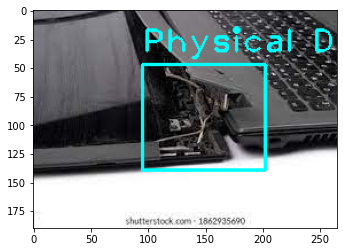

In [18]:
 if len(indexes)>0:
    for i in indexes.flatten():
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv.putText(img, label, (x, y - 10), font, 2, color, 2)

            


img_color=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_color);

### Draw Bounding Box and Text on the input image

In [ ]:
#  for i in range(len(boxes)):
#         if i in indexes:
#             x, y, w, h = boxes[i]
#             label = str(classes[class_ids[i]])
#             color = colors[class_ids[i]]
#             cv.rectangle(img, (x, y), (x + w, y + h), color, 3)
#             cv.putText(img, label, (x, y + 30), font, 2, color, 3)

            


# img_color=cv.cvtColor(img,cv.COLOR_BGR2RGB)
# plt.imshow(img_color);

In [ ]:
#cv.imwrite('dog_cat_result.jpg',img_color)

In [ ]:
import glob
images=glob.glob("Images/*.jpg")

In [ ]:
len(images)

### Loop through all images

In [ ]:
for image in images[:]:
    print(image)
    img = cv.imread(image)
    blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

    img_color=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(img_color);

    ### Acquire Height, Width and Number of Channels from Input Image

    height, width, channels = img.shape

    img.shape

    blob.shape

    ### Set blob as Input

    yolo.setInput(blob)

    ### Get Output Layers

    output_layers_name=yolo.getUnconnectedOutLayersNames()
    layeroutput=yolo.forward(output_layers_name)

    ### Loop through Output Layers

    boxes=[]
    confidences=[]
    class_ids=[]

    ### Filter bounding boxes with confidence levels

    for output in layeroutput:
        for detection in output:
            score=detection[5:]
            class_id=np.argmax(score)
            confidence=score[class_id]

            if confidence>0.7:
                center_x=int(detection[0]*width)
                center_y=int(detection[1]*height)
                w=int(detection[2]*width)
                h=int(detection[3]*height)

                x=int(center_x-w/2)
                y=int(center_y-h/2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    ### Set indexes, font and colors for each bounding box

    indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    font = cv.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0, 255, size=(len(classes), 3))

    ### Draw Bounding Box and Text on the input image

    if len(indexes)>0:
        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv.rectangle(img, (x, y), (x + w, y + h), color, 3)
            cv.putText(img, label, (x, y + 30), font, 2, color, 3)




    #img_color=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    #plt.imshow(img_color);
    
    output_image=image.split("\\")[1]
    cv.imwrite(f'Output_images_training/{output_image}',img)